### Быстрое выделение признаков без расширения данных

In [2]:
from keras.applications import VGG16

In [3]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [15]:
base_dir = 'C:\DataSets\dogs-vs-cats_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [10]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150, 150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count: #Генератор будет возвращать данные бесконечно, это - условие выхода
            break
    return features, labels

In [12]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [14]:
from keras import models
from keras import layers
from keras import optimizers

In [15]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [16]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.5890 - acc: 0.6785 - val_loss: 0.4354 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4194 - acc: 0.8070 - val_loss: 0.3590 - val_acc: 0.8650
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3517 - acc: 0.8515 - val_loss: 0.3334 - val_acc: 0.8570
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3162 - acc: 0.8675 - val_loss: 0.2991 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2835 - acc: 0.8830 - val_loss: 0.2877 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2630 - acc: 0.8955 - val_loss: 0.2798 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2484 - acc: 0.9065 - val_loss: 0.2675 - val_acc: 0.8940
Epoch 8/30
200

In [17]:
import matplotlib.pyplot as plt

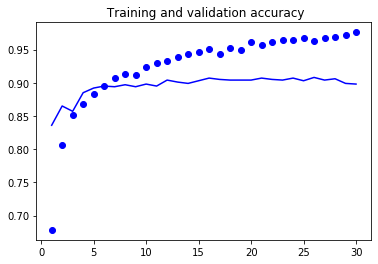

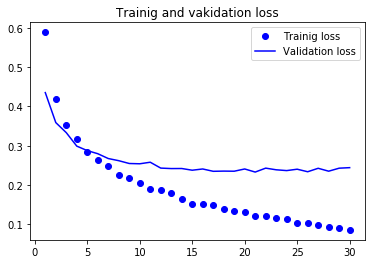

In [20]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Trainig acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title(" Training and validation accuracy")

plt.figure()
plt.plot(epochs, loss, 'bo', label='Trainig loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainig and vakidation loss')
plt.legend()
plt.show()

### Выделение признаков с расширением данных

In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [7]:
conv_base.trainable = False

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [19]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 843s 8s/step - loss: 0.5795 - acc: 0.7020 - val_loss: 0.4081 - val_acc: 0.8240
Epoch 2/30
100/100 [==============================] - 842s 8s/step - loss: 0.4823 - acc: 0.7825 - val_loss: 0.4727 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 836s 8s/step - loss: 0.4371 - acc: 0.8085 - val_loss: 0.1788 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 836s 8s/step - loss: 0.4072 - acc: 0.8205 - val_loss: 0.3377 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 836s 8s/step - loss: 0.3959 - acc: 0.8140 - val_loss: 0.2563 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 836s 8s/step - loss: 0.3700 - acc: 0.8415 - val_loss: 0.4716 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 836s 8s/step - loss: 0.3608 - acc: 0.8425 - val_loss: 0.1272 - val_acc: 0.8800
Epoch 8/30
100/100 [==============================] - 836s 8s/step - 

In [20]:
model.save('cats_and_dogs_small_VGG16.h5')